### Exercicis d'anàlisi de sentiment i textos.

### Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [17]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#nltk.download('all')



El texto escogido para este análisis de sentimiento, es el speech de Dave Grohl, líder de Foo Fighters y ex batería de Nirvana, en el funeral de Lemmy Kilmister, líder de la banda de rock Motörhead.

Dave Grohl comparte sus experiencias y recuerdos personales sobre Lemmy Kilmister, líder de la banda Motörhead. 
Revela la conexión personal y el profundo respeto que tenía por Lemmy, destacando no solo la figura icónica del rock sino también la humanidad y la amabilidad que Lemmy mostraba hacia los demás. 

La combinación de anécdotas divertidas y momentos emotivos, da un tono positivo y humorístico al discurso. 

In [18]:
from textblob import TextBlob
from newspaper import Article


url = 'https://speakola.com/eulogy/for-lemmy-kilmister-dave-grohl-2016'

article = Article(url)

article.download()
article.parse()
article.nlp()

text = article.text
print(text)

10 January 2016, Forest Lawn Memorial Cemetery, Los Angeles, USA

The funeral streaming had technical difficulties during the amazing Dave Grohl eulogy. It's worth persevering, and the beautiful, tears-inducing Little Richard finale is in full sound from 7.00.

Hi guys

There’s not enough time for me to tell you how much Lemmy meant to me, and all the amazing experiences I had with him.

The first time I met Lemmy was at fucken Crazy Girls about twenty years ago, and I was walking back from the mens’ room, and on the way back, I looked to my left and I saw Lemmy by himself in the corner on a video game. And it blew my mind. I knew that I couldn’t just go say something because he was on his own in the corner. On the way out I thought, ‘I have to say something. He’s my hero. He’s the one true rock ’n ’roller that bridged my love of ACDC and Sabbath and Zeppelin with my love of GBH and the Ramones and Black Flag. So I walked up and said, ‘Excuse me Lemmy, I don’t want to bother you, but y

In [19]:
text = text.lower()
tokenized_word=word_tokenize(text)

tokenized_word = [w for w in tokenized_word if w.isalpha()]

print(tokenized_word)

['january', 'forest', 'lawn', 'memorial', 'cemetery', 'los', 'angeles', 'usa', 'the', 'funeral', 'streaming', 'had', 'technical', 'difficulties', 'during', 'the', 'amazing', 'dave', 'grohl', 'eulogy', 'it', 'worth', 'persevering', 'and', 'the', 'beautiful', 'little', 'richard', 'finale', 'is', 'in', 'full', 'sound', 'from', 'hi', 'guys', 'there', 's', 'not', 'enough', 'time', 'for', 'me', 'to', 'tell', 'you', 'how', 'much', 'lemmy', 'meant', 'to', 'me', 'and', 'all', 'the', 'amazing', 'experiences', 'i', 'had', 'with', 'him', 'the', 'first', 'time', 'i', 'met', 'lemmy', 'was', 'at', 'fucken', 'crazy', 'girls', 'about', 'twenty', 'years', 'ago', 'and', 'i', 'was', 'walking', 'back', 'from', 'the', 'mens', 'room', 'and', 'on', 'the', 'way', 'back', 'i', 'looked', 'to', 'my', 'left', 'and', 'i', 'saw', 'lemmy', 'by', 'himself', 'in', 'the', 'corner', 'on', 'a', 'video', 'game', 'and', 'it', 'blew', 'my', 'mind', 'i', 'knew', 'that', 'i', 'couldn', 't', 'just', 'go', 'say', 'something', 'b

In [20]:
from nltk import FreqDist


fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 356 samples and 939 outcomes>


In [21]:
word_df = pd.DataFrame(fdist.most_common(15))
word_df.columns = ['Common_words','count']
word_df


,Common_words,count
0,and,55
1,i,43
2,the,37
3,my,26
4,to,23
5,he,21
6,it,16
7,s,16
8,was,16
9,a,15


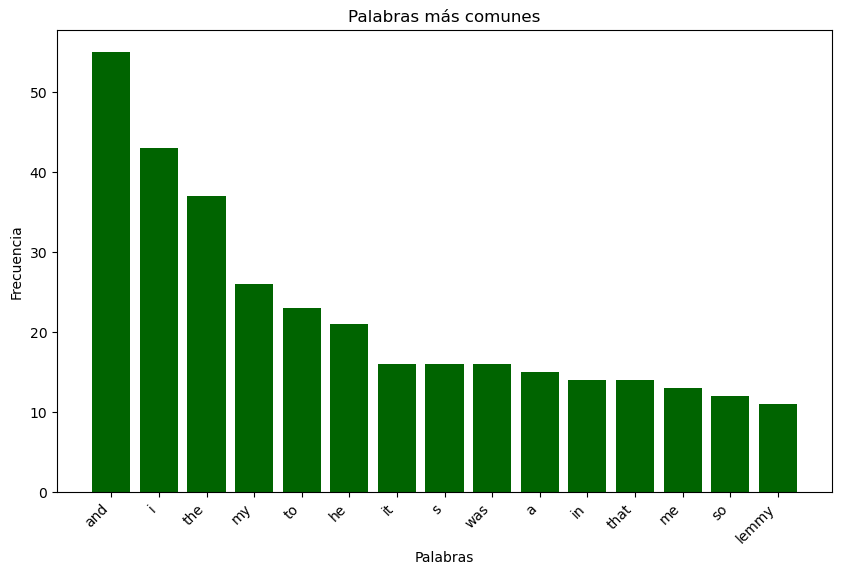

In [22]:
import matplotlib.pyplot as plt

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(word_df['Common_words'], word_df['count'], color='darkgreen')
plt.title('Palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  
plt.show()

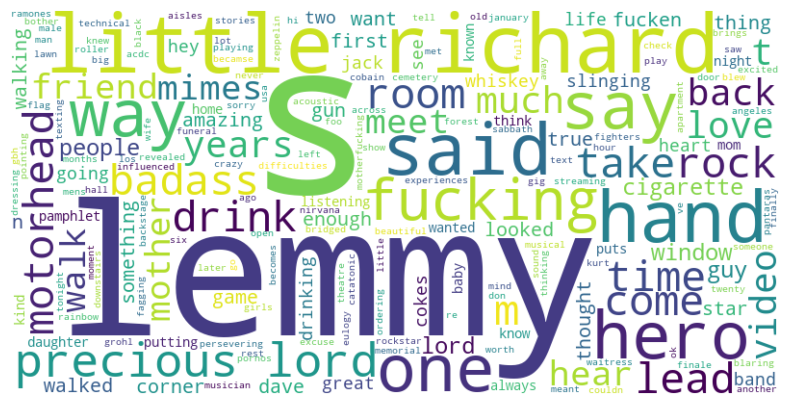

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtén el texto procesado y tokenizado
text = "tokenized_word"  # Reemplaza con tu texto procesado y tokenizado

# Crea el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokenized_word))

# Muestra el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Exercici 2

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [24]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
print(stop_words)

{'hers', 'below', 'he', 'we', 'shan', 'after', 'herself', 'just', 'her', 'm', 'didn', 'off', 'own', 'to', 'them', 'too', 'mightn', 'same', 'they', 'she', 'over', 'then', "wouldn't", 'down', 'very', 'd', 'is', 'as', "you'll", 'during', 'mustn', 'again', 'having', 'than', 'yourselves', "won't", 'with', 're', 'can', 'do', 'ourselves', 'on', "you've", 'while', 'will', 'who', 'doesn', 'it', 'in', 'won', 'doing', 'wasn', 'i', 'their', 'that', "that'll", 'or', 'here', 'where', 'each', 'all', 'be', 'its', 'few', "didn't", "isn't", "shan't", 'why', 'through', 'my', 'weren', 'was', "don't", 'only', 'these', 'are', 'for', 'll', 'up', 'hadn', 'myself', "needn't", 'under', 'because', 'whom', 'this', 'don', 'of', 'any', 'your', "it's", 'were', 'if', "hasn't", 't', 'couldn', 'against', 'does', 'me', "wasn't", 'nor', 'wouldn', "doesn't", 'ours', 'an', 'o', "couldn't", 'not', 'the', 'but', 'y', 'what', 'been', 'am', 'ma', 'did', 'a', 'yourself', 'have', 'no', 'haven', 'needn', 'our', "mustn't", 'had', 

In [25]:
filtered_word = [w for w in tokenized_word if w not in stop_words]

print("Tokenized Words:",tokenized_word)
print("Filtered Words:",filtered_word)

Tokenized Words: ['january', 'forest', 'lawn', 'memorial', 'cemetery', 'los', 'angeles', 'usa', 'the', 'funeral', 'streaming', 'had', 'technical', 'difficulties', 'during', 'the', 'amazing', 'dave', 'grohl', 'eulogy', 'it', 'worth', 'persevering', 'and', 'the', 'beautiful', 'little', 'richard', 'finale', 'is', 'in', 'full', 'sound', 'from', 'hi', 'guys', 'there', 's', 'not', 'enough', 'time', 'for', 'me', 'to', 'tell', 'you', 'how', 'much', 'lemmy', 'meant', 'to', 'me', 'and', 'all', 'the', 'amazing', 'experiences', 'i', 'had', 'with', 'him', 'the', 'first', 'time', 'i', 'met', 'lemmy', 'was', 'at', 'fucken', 'crazy', 'girls', 'about', 'twenty', 'years', 'ago', 'and', 'i', 'was', 'walking', 'back', 'from', 'the', 'mens', 'room', 'and', 'on', 'the', 'way', 'back', 'i', 'looked', 'to', 'my', 'left', 'and', 'i', 'saw', 'lemmy', 'by', 'himself', 'in', 'the', 'corner', 'on', 'a', 'video', 'game', 'and', 'it', 'blew', 'my', 'mind', 'i', 'knew', 'that', 'i', 'couldn', 't', 'just', 'go', 'say'

In [26]:
# Hacemos stemming

from nltk.stem import PorterStemmer


ps = PorterStemmer()

stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Words:",filtered_word)
print("Stemmed Words:",stemmed_words)

Filtered Words: ['january', 'forest', 'lawn', 'memorial', 'cemetery', 'los', 'angeles', 'usa', 'funeral', 'streaming', 'technical', 'difficulties', 'amazing', 'dave', 'grohl', 'eulogy', 'worth', 'persevering', 'beautiful', 'little', 'richard', 'finale', 'full', 'sound', 'hi', 'guys', 'enough', 'time', 'tell', 'much', 'lemmy', 'meant', 'amazing', 'experiences', 'first', 'time', 'met', 'lemmy', 'fucken', 'crazy', 'girls', 'twenty', 'years', 'ago', 'walking', 'back', 'mens', 'room', 'way', 'back', 'looked', 'left', 'saw', 'lemmy', 'corner', 'video', 'game', 'blew', 'mind', 'knew', 'go', 'say', 'something', 'corner', 'way', 'thought', 'say', 'something', 'hero', 'one', 'true', 'rock', 'n', 'roller', 'bridged', 'love', 'acdc', 'sabbath', 'zeppelin', 'love', 'gbh', 'ramones', 'black', 'flag', 'walked', 'said', 'excuse', 'lemmy', 'want', 'bother', 'influenced', 'much', 'musical', 'hero', 'musician', 'play', 'foo', 'fighters', 'nirvana', 'looked', 'video', 'game', 'first', 'thing', 'ever', 'sa

In [27]:
print(FreqDist(tokenized_word))
print(FreqDist(stemmed_words))

<FreqDist with 356 samples and 939 outcomes>
<FreqDist with 259 samples and 444 outcomes>


### Exercici 3

Realitza sentiment analysis al teu conjunt de dades.

In [31]:
from textblob import TextBlob

# Creamos un texto a partir de las stemmed words
text_blob = TextBlob(" ".join(stemmed_words))

# Obtenemos la polaridad del sentimiento (-1 a 1)
sentiment_polarity = text_blob.sentiment.polarity

# Clasificamos el sentimiento en positivo, negativo o neutro
if sentiment_polarity > 0:
    sentiment_label = 'Positivo'
elif sentiment_polarity < 0:
    sentiment_label = 'Negativo'
else:
    sentiment_label = 'Neutro'

# Resultados
print("Texto con stemming:", " ".join(stemmed_words))
print("Puntuación de polaridad del sentimiento:", sentiment_polarity)
print("Etiqueta del sentimiento:", sentiment_label)


Texto con stemming: januari forest lawn memori cemeteri lo angel usa funer stream technic difficulti amaz dave grohl eulog worth persev beauti littl richard final full sound hi guy enough time tell much lemmi meant amaz experi first time met lemmi fucken crazi girl twenti year ago walk back men room way back look left saw lemmi corner video game blew mind knew go say someth corner way thought say someth hero one true rock n roller bridg love acdc sabbath zeppelin love gbh ramon black flag walk said excus lemmi want bother influenc much music hero musician play foo fighter nirvana look video game first thing ever said said sorri friend kurt cobain moment reveal badass motherfuck rock star gun sling whiskey drink badass mother fuck rockstar heart walk away think never see enough rest life becams friend one thing hero anoth hero becom friend year lot great stori go apart walk aisl porno go rainbow order two jack coke waitress bring two jack coke fuck male one time text say hey man band pl

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Creamos un texto a partir de las stemmed words
text = " ".join(stemmed_words)

# Tokenizamos las palabras
tokenized_words = word_tokenize(text)

# analizador de sentimientos de VADER
sia = SentimentIntensityAnalyzer()

# puntuación de polaridad del sentimiento
sentiment_scores = sia.polarity_scores(text)

# polaridad del sentimiento
sentiment_polarity = sentiment_scores['compound']

# Clasificamos el sentimiento en positivo, negativo o neutro
if sentiment_polarity > 0:
    sentiment_label = 'Positivo'
elif sentiment_polarity < 0:
    sentiment_label = 'Negativo'
else:
    sentiment_label = 'Neutro'


print("Texto con stemming:", text)
print("Puntuación de polaridad del sentimiento:", sentiment_polarity)
print("Etiqueta del sentimiento:", sentiment_label)


Texto con stemming: januari forest lawn memori cemeteri lo angel usa funer stream technic difficulti amaz dave grohl eulog worth persev beauti littl richard final full sound hi guy enough time tell much lemmi meant amaz experi first time met lemmi fucken crazi girl twenti year ago walk back men room way back look left saw lemmi corner video game blew mind knew go say someth corner way thought say someth hero one true rock n roller bridg love acdc sabbath zeppelin love gbh ramon black flag walk said excus lemmi want bother influenc much music hero musician play foo fighter nirvana look video game first thing ever said said sorri friend kurt cobain moment reveal badass motherfuck rock star gun sling whiskey drink badass mother fuck rockstar heart walk away think never see enough rest life becams friend one thing hero anoth hero becom friend year lot great stori go apart walk aisl porno go rainbow order two jack coke waitress bring two jack coke fuck male one time text say hey man band pl

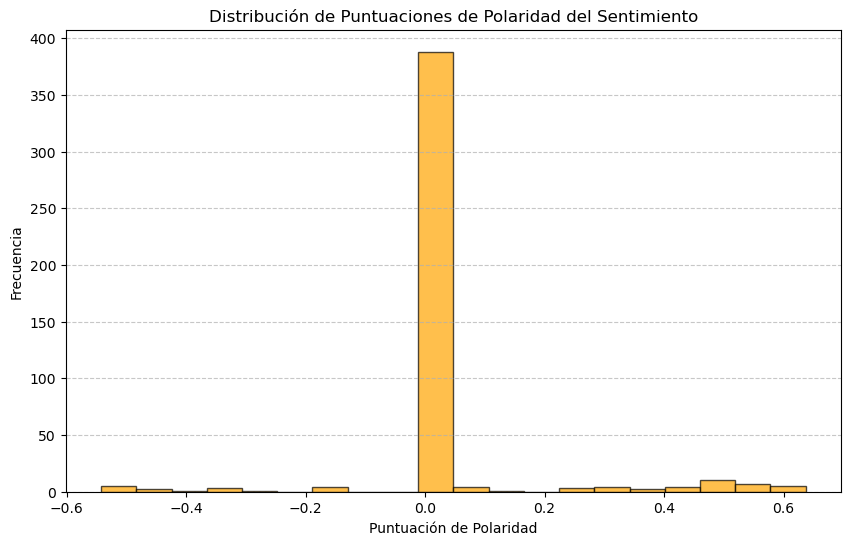

In [30]:
import matplotlib.pyplot as plt

# 'sentiment_scores' es una lista de puntuaciones de polaridad para cada palabra
sentiment_scores_list = [sia.polarity_scores(word)['compound'] for word in tokenized_words]

# Grafico
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores_list, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribución de Puntuaciones de Polaridad del Sentimiento')
plt.xlabel('Puntuación de Polaridad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


El análisis de sentimiento da como resultado una evaluación positiva, que coincide con la interpretación que ya teníamos del discurso. 

Hemos utilizado 2 métodos de análisis de sentimiento:

- TextBlob analysis ---> Puntuación de polaridad del sentimiento: 0.1012962962962963

- Sentiment intensity analyzer (SIA) ---> Puntuación de polaridad del sentimiento: 0.997

Se constata que el modelo SIA es un mejor modelo. Ofrece una mayor precisión ya que está entrenado para entender el contexto y la intensidad del sentimiento. La puntuación de polaridad obtenida muy cercana a 1 nos lo confirma.

Por lo contrario, el modelo TextBlob no tiene esa capacidad de entender el contexto. Calcula la polaridad del sentimiento sumando la polaridad de las palabras individuales y después normaliza el resultado. De ahí que el resultado de 0.101296, aún siendo positico, se aproxime más a la neutralidad.